# Heart Disease prediction
- [Data](./data/heart.csv) is from [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)
- Original dataset is from [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets/heart+disease)

<details>
<summary><b>Additional Information</b></summary>
<p><a href="./data/heart.csv">heart.csv</a> is training data with id as index.</p>
<p>This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to
 this date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).</p>
</details>

<details>
<summary><b>Columns Description</b></summary>
<p>

1. **age**: Age in years
2. **Sex**: sex (1 = male; 0 = female)
3. **cp**:  chest pain type
- 1: typical angina
- 2: atypical angina
- 3: non-anginal pain
- 4: asymptomatic
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5. **chol**: serum cholestoral in mg/dl
6. **fbs**:  (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results
- 0: normal
- 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: maximum heart rate achieved
9.  **exang**:  exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment
- 1: upsloping
- 2: flat
- 3: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect

***Target Variable***
14. **num**: diagnosis of heart disease (angiographic disease status)
- 0: < 50% diameter narrowing
- 1: > 50% diameter narrowing
</p>
</details>

## Idea
Using **Neural networks** to make ML model
- `3` hidden layers
- - 1st layer - `18` neurons (`relu`)
- - 2nd layer - `36` neurons (`relu`)
- - 3rd layer - `9` neurons  (`relu`)
- 4th layer - output layer (`sigmoid`)
-  *logistic regression* to predict heart disease.

# Approach
1. Import required libraries
2. Load data
3. Feature Selection
4. Split data for cross-validation
5. Feature Scaling
6. Make $1^{st}$ **neural network**
- -  Fit the data
- - Save the weights
- - Plot learning curve
- -  Do predictions on `valid` and `test` data
- - Check accuracy on `train`, `valid` and `test` data
7. Make $2^{nd}$ **neural network** with less layers and repeat $6^{th}$ step
8. Make $3^{rd}$ **neural network** with more layers and repeat $6^{th}$ step
9.  Finalize best model
10.  Save best model

## 1. Importing required libraries

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
from pickle import dump
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 2. Loading data

In [2]:
data = pd.read_csv("./data/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 3. Selecting features

In [3]:
features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "thalach", "exang"]
data = data[features + ["target"]]

In [4]:
data.shape

(1025, 9)

## 4. Splitting training `70%` and valdiation `20%` and testing `10%` data

In [55]:
X_full = data.iloc[:, :-1].copy(deep=True)
Y_full = data.iloc[:, -1].copy(deep=True)

X, X_test, Y, Y_test = train_test_split(X_full, Y_full, test_size=0.1, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=0)

In [6]:
X_train = tf.convert_to_tensor(X_train)
X_valid = tf.convert_to_tensor(X_valid)
X_test = tf.convert_to_tensor(X_test)

Y_train = tf.convert_to_tensor(Y_train)
Y_valid = tf.convert_to_tensor(Y_valid)
Y_test = tf.convert_to_tensor(Y_test)

In [7]:
m_train, n_train = X_train.shape
m_valid, n_valid = X_valid.shape
m_test , n_test  = X_test.shape

[(m_train, n_train), (m_valid, n_valid), (m_test, n_test)]

[(737, 8), (185, 8), (103, 8)]

## 5. Feature Scaling using `tf.keras.layers.Normalization`

In [8]:
scaler = tf.keras.layers.Normalization()
scaler.adapt(X_train)
X_train = scaler(X_train)
X_valid = scaler(X_valid)
X_test = scaler(X_test)

In [9]:
X_train.shape

TensorShape([737, 8])

## 6. Making $1^{st}$ neural network
**Architecture:**
- 1st input layer
- `3` hidden layers
- - 1st layer - `18` neurons (`relu`)
- - 2nd layer - `36` neurons (`relu`)
- - 3rd layer - `9` neurons  (`relu`)
- 4th layer - output layer (`sigmoid`)

In [10]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=n_train),
    tf.keras.layers.Dense(units=18, activation="relu", name="L1"),
    tf.keras.layers.Dense(units=36, activation="relu", name="L2"),
    tf.keras.layers.Dense(units=9, activation="relu", name="L3"),
    tf.keras.layers.Dense(units=1, name="output_layer")
], name="model_1")

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 18)                162       
                                                                 
 L2 (Dense)                  (None, 36)                684       
                                                                 
 L3 (Dense)                  (None, 9)                 333       
                                                                 
 output_layer (Dense)        (None, 1)                 10        
                                                                 
Total params: 1,189
Trainable params: 1,189
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

### 6.a. Fitting `training` data

In [13]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0)

### 6.b. Saving / Loading weights to `model_1_weights`

In [14]:
# model.save_weights("./weights/model_1_weights.h5")
model_1_weights = model.load_weights("./weights/model_1_weights.h5")

### 6.c. Plotting learning curve

In [15]:
def plot_learning_curve(loss):
    plt.title("Learning Curve")
    plt.xlabel("No. of iterations")
    plt.ylabel("Loss")
    sns.lineplot(x=np.arange(len(loss)), y=loss)
    plt.tight_layout()

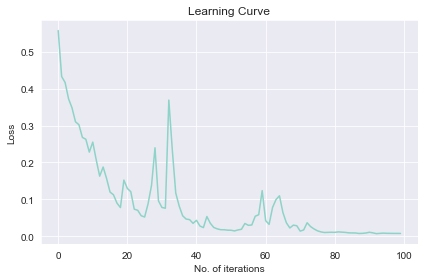

In [16]:
loss = history.history["loss"]
plot_learning_curve(loss)

### 6.d. Predicting `valid` and `test` data

In [17]:
def predict(model, data):
    logits = model(data)
    preds = tf.nn.sigmoid(logits).numpy()

    for i in range(data.shape[0]):
        preds[i] = 1 if preds[i] >= 0.5 else 0
    return preds

In [18]:
valid_preds = predict(model, X_valid)
valid_preds[:10]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [19]:
test_preds = predict(model, X_test)
test_preds[:10]

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

### 6.e. Checking accuracy

In [20]:
model.metrics_names

['loss', 'accuracy']

#### Training data accuracy: `99.19%`

In [21]:
train_loss_1, train_acc_1 = model.evaluate(X_train, Y_train)
round(train_acc_1 * 100, 2)

24/24 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9919


99.19

#### Validation data accuracy: `97.84%`

In [22]:
valid_loss_1, valid_acc_1 = model.evaluate(X_valid, Y_valid)
round(valid_acc_1 * 100, 2)

6/6 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9784


97.84

#### Test data accuracy: `97.09%`

In [23]:
test_loss_1, test_acc_1 = model.evaluate(X_test, Y_test)
round(test_acc_1 * 100, 2)

4/4 [==============================] - 0s 4ms/step - loss: 0.0455 - accuracy: 0.9709


97.09

## 7. Making $2^{nd}$ Neural Network
**Architecture:**
- `2` hidden layers
- - 1st layer - `18` neurons (`relu`)
- - 2nd layer - `9` neurons (`relu`)
- 3rd layer - output layer (`sigmoid`)

In [24]:
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=n_train),
    tf.keras.layers.Dense(units=18, activation="relu", name="L1"),
    tf.keras.layers.Dense(units=9, activation="relu", name="L2"),
    tf.keras.layers.Dense(units=1, name="output_layer")
], name="model_2")

In [25]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 18)                162       
                                                                 
 L2 (Dense)                  (None, 9)                 171       
                                                                 
 output_layer (Dense)        (None, 1)                 10        
                                                                 
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

### 7.a. Fitting training data

In [27]:
history_2 = model_2.fit(X_train, Y_train, epochs=100, verbose=0)

### 7.b. Saving / Loading weights of $2^{nd}$ neural network

In [28]:
# model_2.save_weights("./weights/model_2_weights.h5")
model_2.load_weights("./weights/model_2_weights.h5")

### 7.c. Plotting learning curve

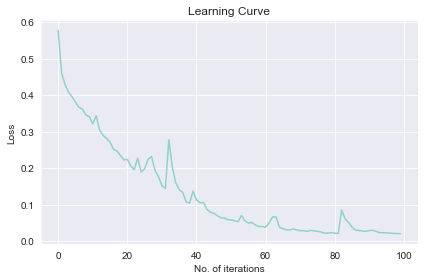

In [29]:
loss_2 = history_2.history["loss"]
plot_learning_curve(loss_2)

### 7.d. Predicting `valid` and `test` data

In [30]:
valid_preds_2 = predict(model_2, X_valid)
valid_preds_2[:10]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [31]:
test_preds_2 = predict(model_2, X_test)
test_preds_2[:10]

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

### 7.e. Checking accuracy

#### Training accuracy: `97.83%`

In [32]:
train_loss_2, train_acc_2 = model_2.evaluate(X_train, Y_train)
round(train_acc_2 * 100, 2)

24/24 [==============================] - 0s 7ms/step - loss: 0.0422 - accuracy: 0.9783


97.83

#### Validation accuracy: `98.38%`

In [33]:
valid_loss_2, valid_acc_2 = model_2.evaluate(X_valid, Y_valid)
round(valid_acc_2 * 100, 2)

6/6 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.9838


98.38

#### Testing accuracy: `98.06%`

In [34]:
test_loss_2, test_acc_2 = model_2.evaluate(X_test, Y_test)
round(test_acc_2 * 100, 2)

4/4 [==============================] - 0s 5ms/step - loss: 0.0775 - accuracy: 0.9806


98.06

## 8. Making $3^{rd}$ neural network

**Architecture:**
- `5` hidden layers
- - 1st layer - `18` neurons (`relu`)
- - 2nd layer - `36` neurons (`relu`)
- - 3rd layer - `64` neurons (`relu`)
- - 4th layer - `18` neurons (`relu`)
- - 5th layer - `9` nuerons (`relu`)
- 6th layer - output layer (`sigmoid`)

In [35]:
model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=n_train),
    tf.keras.layers.Dense(units=18, activation="relu", name="L1"),
    tf.keras.layers.Dense(units=36, activation="relu", name="L2"),
    tf.keras.layers.Dense(units=64, activation="relu", name="L3"),
    tf.keras.layers.Dense(units=18, activation="relu", name="L4"),
    tf.keras.layers.Dense(units=9, activation="relu", name="L5"),
    tf.keras.layers.Dense(units=1, name="output_layer"),
], name="model_3")

In [36]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 18)                162       
                                                                 
 L2 (Dense)                  (None, 36)                684       
                                                                 
 L3 (Dense)                  (None, 64)                2368      
                                                                 
 L4 (Dense)                  (None, 18)                1170      
                                                                 
 L5 (Dense)                  (None, 9)                 171       
                                                                 
 output_layer (Dense)        (None, 1)                 10        
                                                                 
Total params: 4,565
Trainable params: 4,565
Non-trainable p

In [37]:
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

### 8.a. Fitting training data

In [38]:
history_3 = model_3.fit(X_train, Y_train, epochs=100, verbose=0)

### 8.b. Saving / Loading weights of $3^{rd}$ neural network

In [39]:
# model_3.save_weights("./weights/model_3_weights.h5")
model_3.load_weights("./weights/model_3_weights.h5")

### 8.c. Plotting learning curve

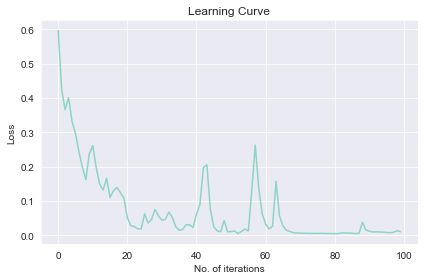

In [40]:
loss_3 = history_3.history["loss"]
plot_learning_curve(loss_3)

### 8.d. Predicting `valid` and `test` data

In [41]:
valid_preds_3 = predict(model_3, X_valid)
valid_preds_3[:10]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [42]:
test_preds_3 = predict(model_3, X_test)
test_preds_3[:10]

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

### 8.e. Checking accuracy

#### Training accuracy: `100%`

In [43]:
train_loss_3, train_acc_3 = model_3.evaluate(X_train, Y_train)
round(train_acc_3 * 100, 2)

24/24 [==============================] - 0s 6ms/step - loss: 3.3469e-04 - accuracy: 1.0000


100.0

#### Validation accuracy: `98.92%`

In [44]:
valid_loss_3, valid_acc_3 = model_3.evaluate(X_valid, Y_valid)
round(valid_acc_3 * 100, 2)

6/6 [==============================] - 0s 6ms/step - loss: 0.3271 - accuracy: 0.9892


98.92

#### Testing accuracy: `99.06%`

In [45]:
test_loss_3, test_acc_3 = model_3.evaluate(X_test, Y_test)
round(test_acc_3 * 100, 2)

4/4 [==============================] - 0s 9ms/step - loss: 0.5873 - accuracy: 0.9806


98.06

## 9. Finalizing the model

In [46]:
print('_'*123)
print(f"| {'Model':<10} | {'Layers':^10} | {'Training':^29} | {'Validation':^29} | {'Testing':^29} |")
print('|','='*12, '|', '='*12, '|', '='*31, '|', '='*31, '|', '='*31, '|', sep='')
for i in [model, model_2, model_3]:

    train_loss, train_acc = i.evaluate(X_train, Y_train, verbose=0)
    valid_loss, valid_acc = i.evaluate(X_valid, Y_valid, verbose=0)
    test_loss, test_acc = i.evaluate(X_test, Y_test, verbose=0)

    print(f"| {i.name.upper():<10} | {len(i.layers):^10} | Accuracy: {round(train_acc*100, 2)}%\t\t  | Accuracy: {round(valid_acc*100, 2)}%\t\t  | Accuracy: {round(test_acc*100, 2)}%\t\t  |")
    print(f"| {'':10} | {'':10} | Loss: {train_loss:<23.10f} | Loss: {valid_loss:<23.10f} | Loss: {test_loss:<23.10f} |")
    
    print('|','_'*12, '|', '_'*12, '|', '_'*31, '|', '_'*31, '|', '_'*31, '|', sep='')

___________________________________________________________________________________________________________________________
| Model      |   Layers   |           Training            |          Validation           |            Testing            |
|============|============|===============================|===============================|===============================|
| MODEL_1    |     4      | Accuracy: 99.19%		  | Accuracy: 97.84%		  | Accuracy: 97.09%		  |
|            |            | Loss: 0.0156881716            | Loss: 0.0361933000            | Loss: 0.0455238111            |
|____________|____________|_______________________________|_______________________________|_______________________________|
| MODEL_2    |     3      | Accuracy: 97.83%		  | Accuracy: 98.38%		  | Accuracy: 98.06%		  |
|            |            | Loss: 0.0422347747            | Loss: 0.0532183312            | Loss: 0.0774993002            |
|____________|____________|_______________________________|_________

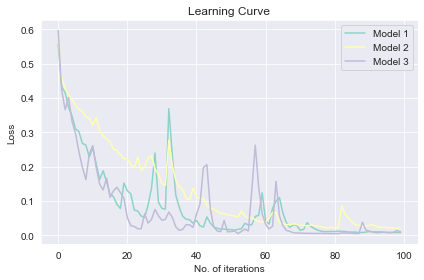

In [47]:
plot_learning_curve(loss)
plot_learning_curve(loss_2)
plot_learning_curve(loss_3)
plt.legend(["Model 1", "Model 2", "Model 3"])

### Observations:
#### Accuracy
1. Model 3 has 100% accuracy whereas, model 1 has 99.19% and model 2 has 97.83% accuracy on training data.
2. Model 3 has highest accuracy on validation set, whereas model 1 less accuracy.
3. Model 2 and 3 has same 98.06% accuracy on test set, whereas model 1 has 97.09% accuracy.
- Model 3 seems to overfit, because of 100% accuracy on training data.

#### Loss
1. Model 3 has least training loss than model 1 and model 2, whereas model 2 has highest loss.
2. Model 3 has highest validation loss, whereas model 1 has least loss.
3. Again, model 3 has highest test loss, whereas model 1 has least loss.
- Model 3 has high chances of overfit, because it's loss is less in training and highest on validation and test dataset.

In [48]:
x = tf.concat([X_valid, X_test], 0)
y = tf.concat([Y_valid, Y_test], 0)

print("Model 1")
final_loss_1, final_acc_1 = model.evaluate(x, y)
print(f"Accuracy: {round(final_acc_1 * 100, 2)}%")
print(f"Loss: {final_loss_1}")

print("Model 2")
final_loss_2, final_acc_2 = model_2.evaluate(x, y)
print(f"Accuracy: {round(final_acc_2 * 100, 2)}%")
print(f"Loss: {final_loss_2}")

print("Model 3")
final_loss_3, final_acc_3 = model_3.evaluate(x, y)
print(f"Accuracy: {round(final_acc_3 * 100, 2)}%")
print(f"Loss: {final_loss_3}")

Model 1
9/9 [==============================] - 0s 4ms/step - loss: 0.0395 - accuracy: 0.9757
Accuracy: 97.57%
Loss: 0.039530254900455475
Model 2
9/9 [==============================] - 0s 5ms/step - loss: 0.0619 - accuracy: 0.9826
Accuracy: 98.26%
Loss: 0.06190214678645134
Model 3
9/9 [==============================] - 0s 5ms/step - loss: 0.4202 - accuracy: 0.9861
Accuracy: 98.61%
Loss: 0.42018944025039673


### Model 2 is final
So, Finalizing model 2, based on accuracy and loss on validation + test data set, because
- It's accuracy is higher than model 1, and less than model 3 (overfit), i.e. `98.26%` 
- Loss is less than model 3

**Architecture:**
- `2` hidden layers
- - 1st layer - `18` neurons (`relu`)
- - 2nd layer - `9` neurons (`relu`)
- 3rd layer - output layer (`sigmoid`)

## 10. Saving Model $2$

In [53]:
model_2.save("final_model.h5")

In [54]:
open("model_params.json", "w").write(model_2.to_json(indent=4))

3422

In [65]:
dump(scaler.weights, open("./weights/normalized_weights.bin", "wb"))

In [56]:
X_valid.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang
514,44,1,1,120,220,0,170,0
233,41,0,1,126,306,0,163,0
604,47,1,2,130,253,0,179,0
323,66,1,1,160,246,0,120,1
12,34,0,1,118,210,0,192,0


In [91]:
valid_preds_2[3]

array([0.], dtype=float32)

In [81]:
Y_valid

514    1
233    1
604    1
323    0
12     1
      ..
389    1
598    0
710    1
716    0
245    1
Name: target, Length: 185, dtype: int64

In [82]:
a = X_valid.iloc[2, :]

In [83]:
a

age          47
sex           1
cp            2
trestbps    130
chol        253
fbs           0
thalach     179
exang         0
Name: 604, dtype: int64

In [84]:
def load_scaler():
    from pickle import load
    weights = load(open("./weights/normalized_weights.bin", "rb"))
    scaler = tf.keras.layers.Normalization(weights=weights)
    return scaler

In [85]:
s = load_scaler()
a = s(np.array([a]))

In [89]:
l = model_2(a)
p = tf.nn.sigmoid(l)
p[0][0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9999982>